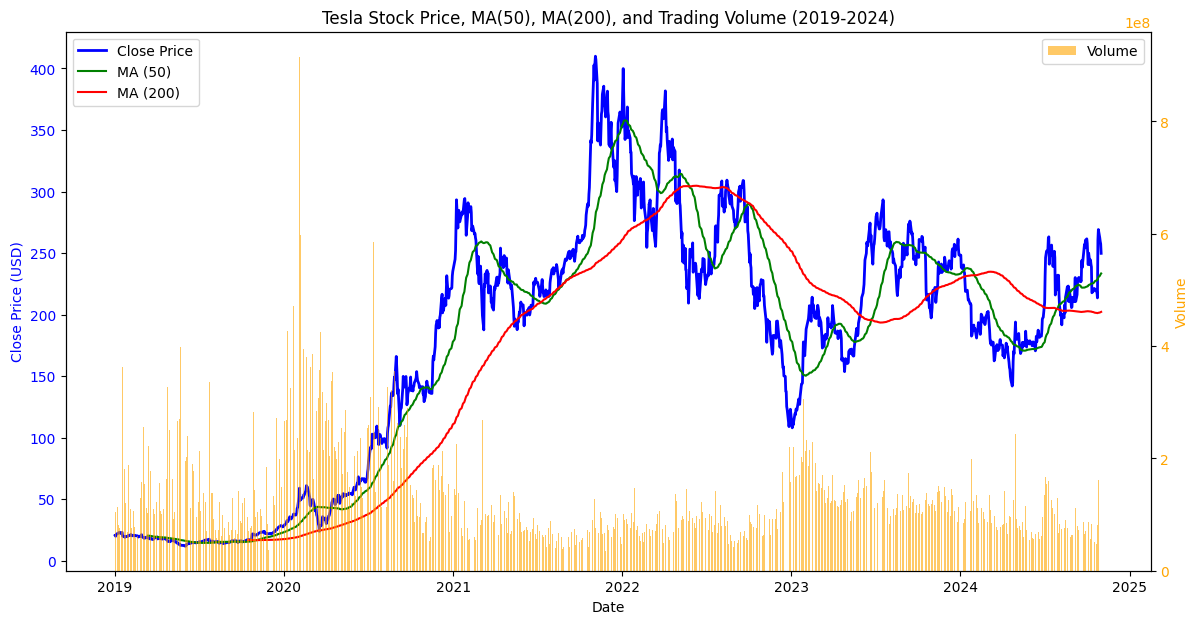

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file
df = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')


# Tính toán MA(50) và MA(200)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Vẽ biểu đồ giá cổ phiếu với trục y bên trái
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ đường giá đóng cửa
ax1.plot(df.index, df['Close'], color='blue', label='Close Price', linewidth=2)

# Vẽ đường MA(50)
ax1.plot(df.index, df['MA50'], color='green', label='MA (50)', linewidth=1.5)

# Vẽ đường MA(200)
ax1.plot(df.index, df['MA200'], color='red', label='MA (200)', linewidth=1.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Tesla Stock Price, MA(50), MA(200), and Trading Volume (2019-2024)')

# Tạo trục y thứ hai cho Volume
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='orange', alpha=0.6, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()


                Close     Volume
Date                            
2019-01-02  20.674667  174879000
2019-01-03  20.024000  104478000
2019-01-04  21.179333  110911500
2019-01-07  22.330667  113268000
2019-01-08  22.356667  105127500


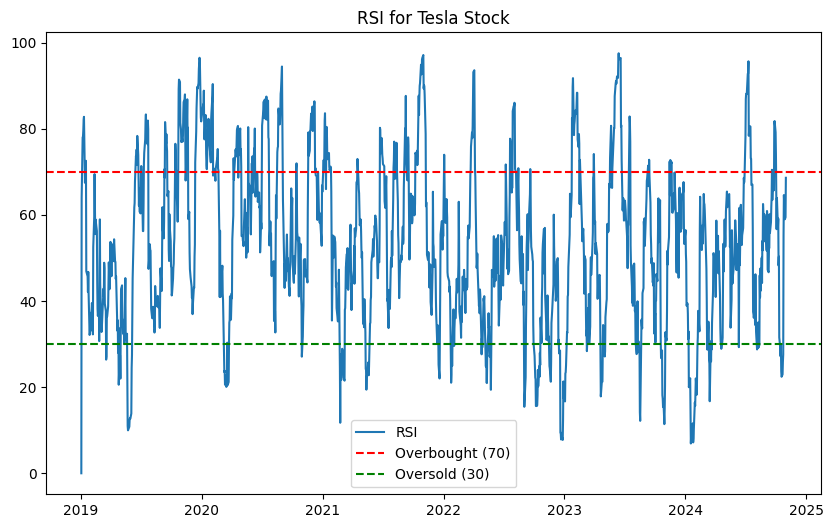

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('Get_data/Tesla_Close_2019_2024.csv', parse_dates=['Date'], index_col='Date')

# Kiểm tra cấu trúc dữ liệu
print(df.head())  # Hiển thị vài dòng đầu tiên của dữ liệu để xác định cột chứa giá đóng cửa

# Hàm tính RSI
def calculate_rsi(data, window=14):
    # Tính sự thay đổi giá giữa các phiên giao dịch
    delta = data.diff()
    
    # Tính mức tăng (positive changes) và mức giảm (negative changes)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Tính trung bình động của mức tăng và mức giảm trong khoảng window (thường là 14)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Tính RS (Relative Strength)
    rs = avg_gain / avg_loss
    
    # Tính RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Giả sử cột 'Close' chứa giá đóng cửa của cổ phiếu
# Kiểm tra tên cột chứa giá đóng cửa và thay thế nếu cần
df['RSI'] = calculate_rsi(df['Close'])  # Nếu cột giá đóng cửa là 'Close'

# Vẽ đồ thị RSI
plt.figure(figsize=(10, 6))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI for Tesla Stock')
plt.legend(loc='best')
plt.show()
